In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
el_2014 = pd.read_excel(r'C:\TIO4317_spring25_project\data\raw\ice_electric-2014.xlsx')

In [4]:
hub_names = el_2014["Price hub"].unique()
List_of_hubs_2014 = [el_2014[el_2014["Price hub"] == hub] for hub in hub_names]


In [ ]:
#For 2014: Tar ut dato og avg price fra hver hub og merger til en df med pris for de ulike hubene. 
df_date_price = List_of_hubs_2014[0][["Trade date",'Wtd avg price $/MWh']]
df_date_price = df_date_price.rename(columns={'Wtd avg price $/MWh': 'Price $/MWh \n'+hub_names[0]})

for i in range(1,len(List_of_hubs_2014)):
    df_date_price_n = List_of_hubs_2014[i][["Trade date",'Wtd avg price $/MWh']]
    df_date_price_n = df_date_price_n.rename(columns={'Wtd avg price $/MWh': 'Price $/MWh \n'+hub_names[i]})
    df_date_price = pd.merge(df_date_price,df_date_price_n,on="Trade date",how="outer")


In [36]:
#Gjør det samme på nytt, men lager en liste med df for hvert år.

List_yearly_hub_prices = []
for i in range(14, 25):
    el = pd.read_excel(f'C:\\TIO4317_spring25_project\\data\\raw\\ice_electric-20{i}.xlsx')
    hub_names = el["Price hub"].unique()
    List_of_hubs = [el[el["Price hub"] == hub] for hub in hub_names]
    df_date_price = List_of_hubs[0][["Trade date",'Wtd avg price $/MWh']]
    df_date_price = df_date_price.rename(columns={'Wtd avg price $/MWh': 'Price $/MWh \n'+hub_names[0]})

    for i in range(1,len(List_of_hubs)):
        df_date_price_n = List_of_hubs[i][["Trade date",'Wtd avg price $/MWh']]
        df_date_price_n = df_date_price_n.rename(columns={'Wtd avg price $/MWh': 'Price $/MWh \n'+hub_names[i]})
        df_date_price = pd.merge(df_date_price,df_date_price_n,on="Trade date",how="outer") #outer for å få med alle datoer,selv om ikke nødvendigvis alle har verdi på samme dato. 
    #df_date_price.set_index('Trade date', inplace=True)
    #df_date_price = df_date_price[~df_date_price.index.duplicated(keep='first')]
    List_yearly_hub_prices.append(df_date_price)

In [39]:
#Året 2014 tror jeg flere skiftet navn underveis...
combined_df = pd.concat(List_yearly_hub_prices[1:], ignore_index=True) #dropper 2014 dataen
combined_df['Trade date'] = pd.to_datetime(combined_df['Trade date']) 
combined_df.set_index('Trade date', inplace=True)
combined_df = combined_df[~combined_df.index.duplicated(keep='first')]
#combined_df = combined_df.drop_duplicates() #vet ikke hvorfor, men hvertfall 2015-04-28 har mange rows med samme data
combined_df

,Price $/MWh \nERCOT North 345KV Peak,Price $/MWh \nIndiana Hub RT Peak,Price $/MWh \nMid C Peak,Price $/MWh \nNepool MH DA LMP Peak,Price $/MWh \nNP15 EZ Gen DA LMP Peak,Price $/MWh \nPalo Verde Peak,Price $/MWh \nPJM WH Real Time Peak,Price $/MWh \nSP15 EZ Gen DA LMP Peak
Trade date,,,,,,,,
2015-01-02,39.50,38.93,21.97,NaN,NaN,27.43,41.76,35.63
2015-01-05,29.07,37.87,23.92,77.79,39.5,32.23,46.81,39.51
2015-01-06,NaN,47.79,23.29,108.52,NaN,28.58,82.97,36.85
2015-01-07,42.25,49.87,23.74,116.63,NaN,26.79,90.95,36.91
2015-01-08,29.86,42.28,22.76,71.33,NaN,24.92,52.80,34.95
...,...,...,...,...,...,...,...,...
2024-12-18,NaN,NaN,39.24,59.16,NaN,29.36,35.51,41.35
2024-12-19,NaN,42.50,33.52,99.17,NaN,24.71,37.81,37.02
2024-12-20,NaN,NaN,39.56,NaN,NaN,32.60,73.51,43.81


In [41]:
combined_df.to_excel("ice_electric-ave_price-2015-2025.xlsx", index=True, float_format="%.2f")


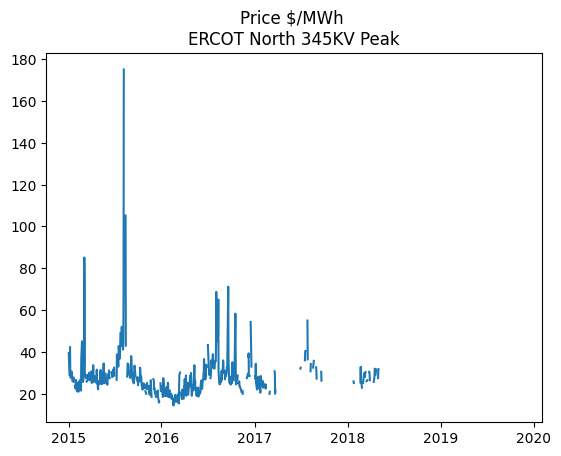

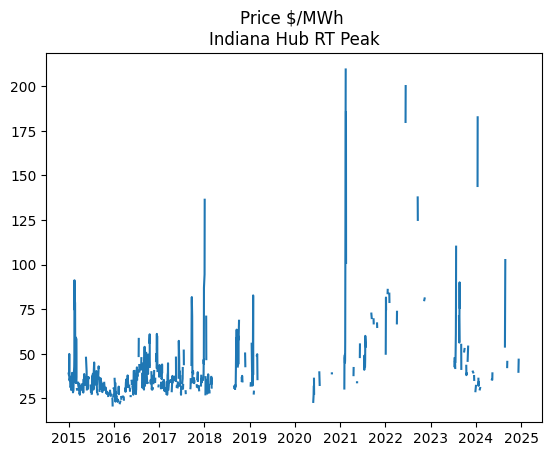

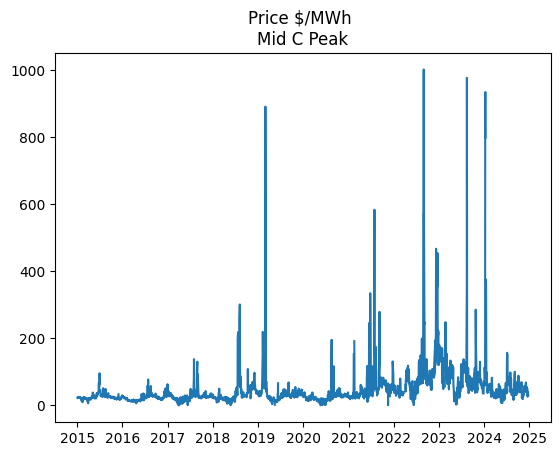

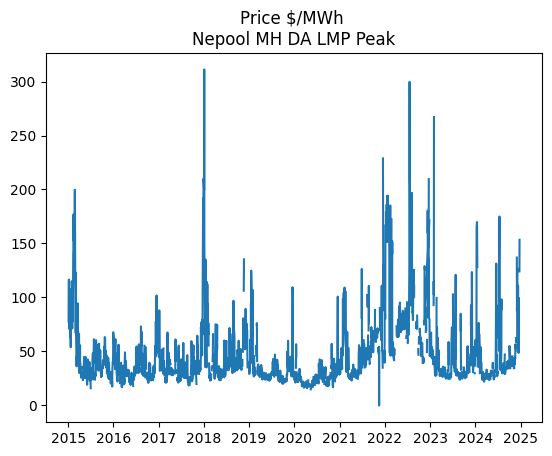

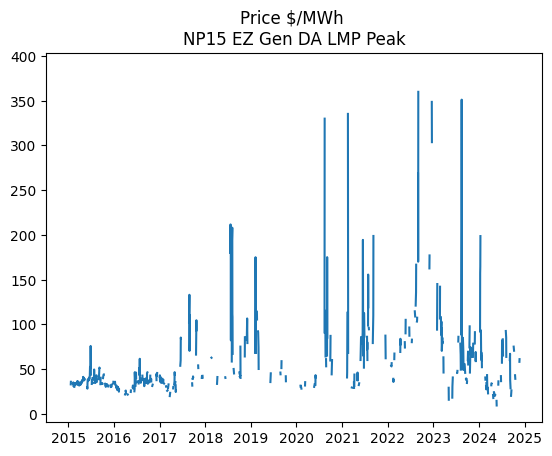

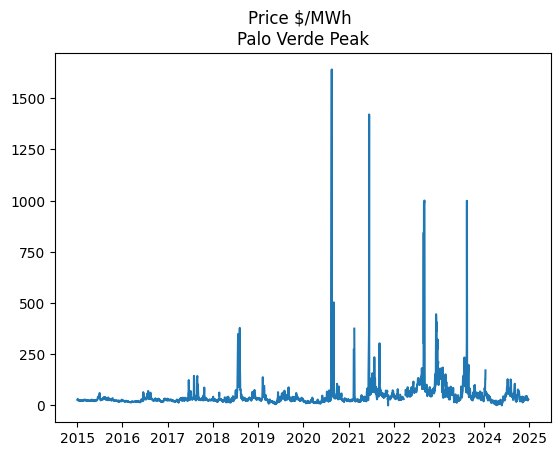

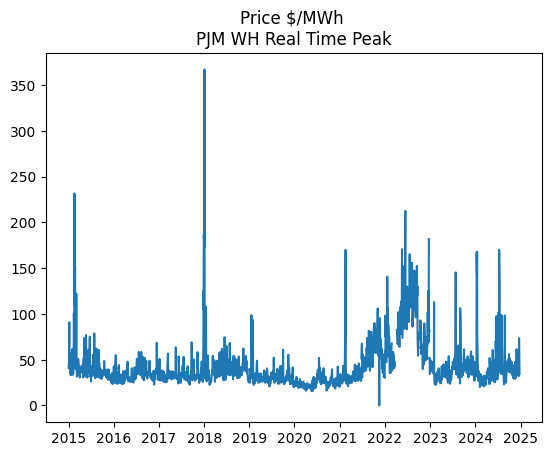

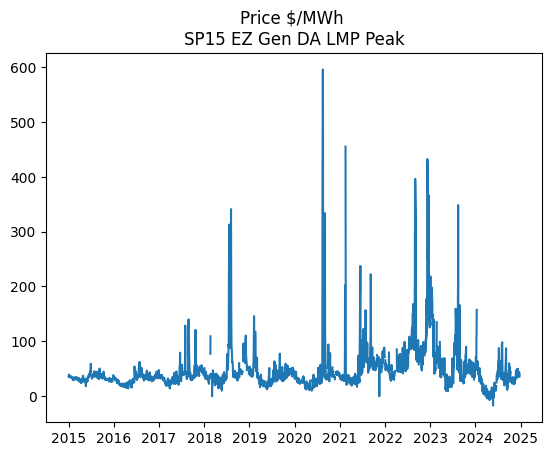

In [35]:
for column in combined_df.iloc[:,1:]:
    plt.figure()
    plt.plot(combined_df['Trade date'],combined_df[column])
    plt.title(column)
    plt.show()

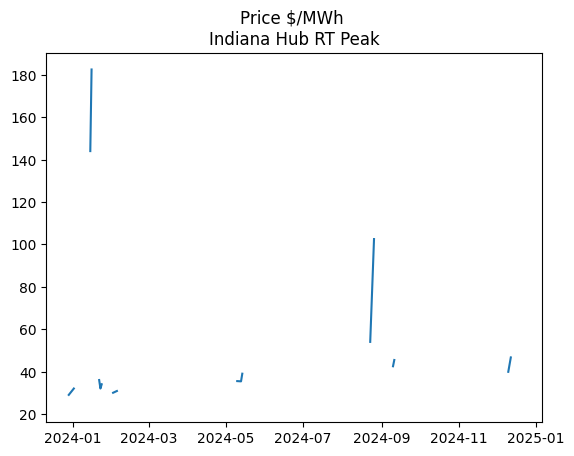

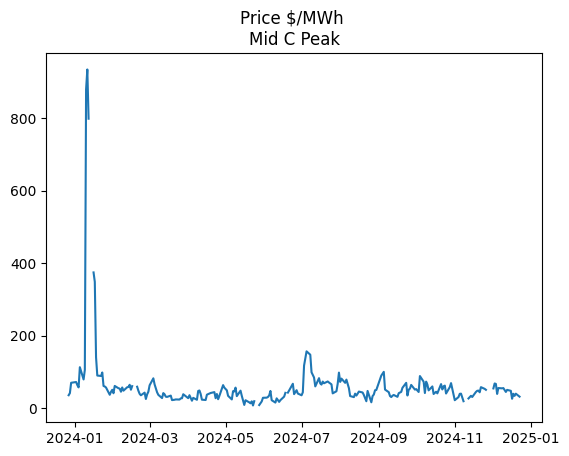

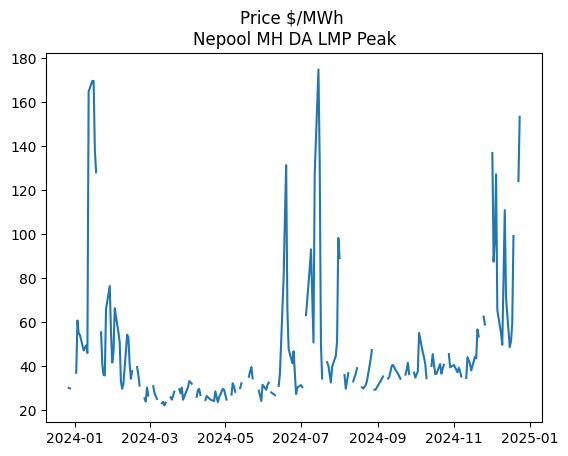

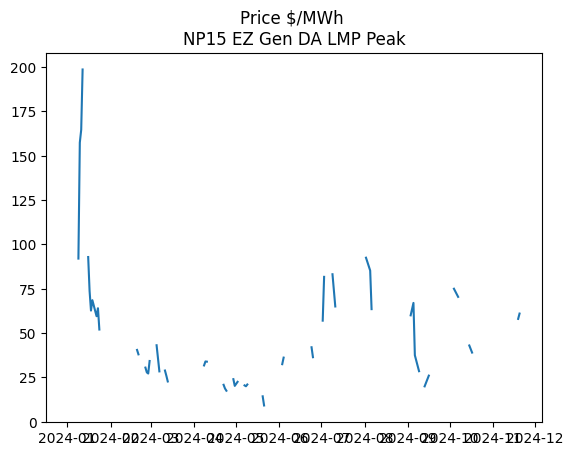

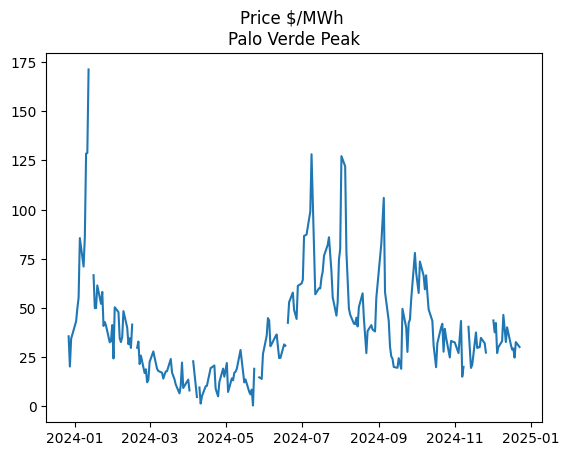

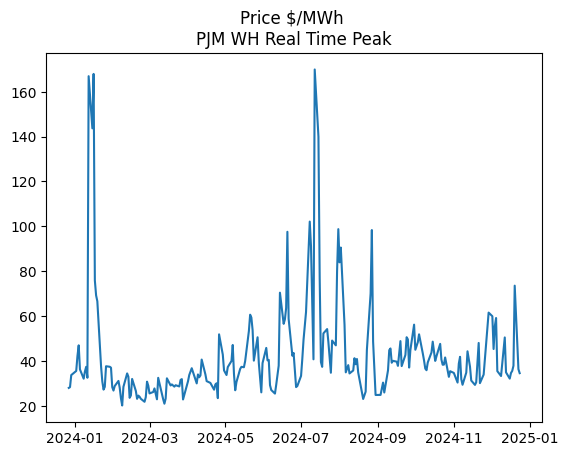

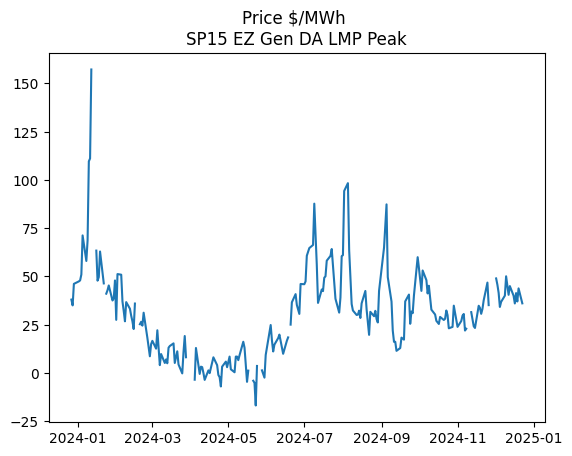

In [9]:
el_2024 = List_yearly_hub_prices[10]
for column in el_2024.columns[1:]:
    plt.figure()
    plt.plot(el_2024['Trade date'],el_2024[column])
    plt.title(column)
    plt.show()

#Noen hubs har mange datoer uten verdier. 